<a href="https://colab.research.google.com/github/Nahmadzai24/DataScienceProject/blob/main/Stock_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Analysis Project**

In [1]:
#load library yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load live data Apple Inc. (AAPL)
apple = yf.Ticker("AAPL")
apple_data = apple.history(period="1y")
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-19 00:00:00-04:00,175.143761,176.934600,174.298097,174.566727,59302900,0.0,0.0
2023-10-20 00:00:00-04:00,174.417500,174.526940,171.761094,171.999878,64189300,0.0,0.0
2023-10-23 00:00:00-04:00,170.039906,173.124115,169.064885,172.119263,55980100,0.0,0.0
2023-10-24 00:00:00-04:00,172.168993,172.785832,170.577133,172.557007,43816600,0.0,0.0
2023-10-25 00:00:00-04:00,171.004971,172.178956,169.781222,170.228943,57157000,0.0,0.0


In [4]:
stockdata=yf.download('AAPL', start='2020-01-01', end='2023-01-01')
stockdata.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565186,132079200


In [5]:
#reset the index
#inplace true use for permanet change
stockdata.reset_index(inplace=True)
stockdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565186,132079200


In [8]:
#using date as feature
stockdata['Days']= (stockdata['Date'] -stockdata['Date'].min()).dt.days
stockdata.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Days
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400,0
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800,1
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742653,118387200,4
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,5
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565186,132079200,6


In [14]:
# define the x and y target
x=stockdata[['Days']]
y=stockdata['Close']

# split the data
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# show the shape of data with label message
print('shape of x_train', x_train.shape)
print('shape of x_test', x_test.shape)
print('shape of y_train', y_train.shape)
print('shape of y_test', y_test.shape)

shape of x_train (604, 1)
shape of x_test (152, 1)
shape of y_train (604,)
shape of y_test (152,)


In [15]:
#apply th elinear regression model
model=LinearRegression()
model.fit(x_train, y_train)
#make predection
y_pred=model.predict(x_test)

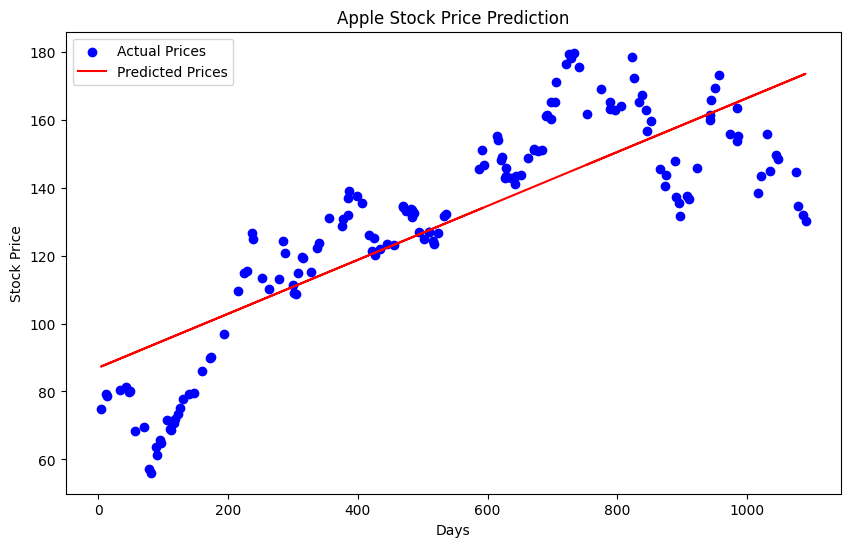

In [16]:
# visualize the actual vs predicted stock prices
plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.plot(x_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.show()